C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10, Train Loss: 1.9719, Val Loss: 1.0016
Epoch 2/10, Train Loss: 1.0212, Val Loss: 0.3210
Epoch 3/10, Train Loss: 0.6076, Val Loss: 0.1336
Epoch 4/10, Train Loss: 0.4190, Val Loss: 0.0807
Epoch 5/10, Train Loss: 0.3316, Val Loss: 0.0448
Epoch 6/10, Train Loss: 0.2632, Val Loss: 0.0354
Epoch 7/10, Train Loss: 0.2264, Val Loss: 0.0232
Epoch 8/10, Train Loss: 0.1994, Val Loss: 0.0173
Epoch 9/10, Train Loss: 0.1626, Val Loss: 0.0161
Epoch 10/10, Train Loss: 0.1269, Val Loss: 0.0109


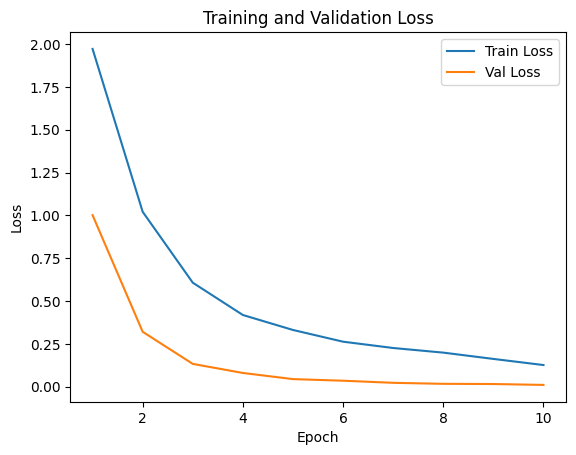

Overall Top-1 Accuracy with Data Augmentation: 1.0000


In [3]:
#USED CHATGPT FOR REFERENCE
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define paths
test_dataset_path = "C:/Users/nikhi/OneDrive/Documents/ML/HW5/fruitveg/testSubset"
train_dataset_path = "C:/Users/nikhi/OneDrive/Documents/ML/HW5/fruitveg/trainSubset"
val_dataset_path = "C:/Users/nikhi/OneDrive/Documents/ML/HW5/fruitveg/valSubset"

# Define transformations with augmentations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define transformations without augmentations for validation and test sets
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets with respective transformations
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_path, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dataset_path, transform=val_test_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=val_test_transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet model
model = torchvision.models.resnet18(pretrained=True)
# Replace the output layer
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Validation
    model.eval()
    running_loss = 0.0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
    epoch_val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

# Plotting training and validation loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation on test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Overall top-1 accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Overall Top-1 Accuracy with Data Augmentation: {accuracy:.4f}")



In [2]:
'''The decreasing trend in training and validation losses indicates that the model is learning efficiently and generalizing well to new data. 
The low validation loss at the end of training (0.0109) indicates that the model performs well on the validation dataset, 
which is a positive indication of its generalizability.A top-1 accuracy of 1.0000 implies that the model performed flawlessly on the test set, 
correctly predicting the top class for each sample. The model's high accuracy also indicates that it has successfully 
learned to distinguish between distinct classes in the dataset, indicating its ability to capture significant patterns 
and features during training.
'''

"The decreasing trend in training and validation losses indicates that the model is learning efficiently and generalizing well to new data. \nThe low validation loss at the end of training (0.0109) indicates that the model performs well on the validation dataset, \nwhich is a positive indication of its generalizability.A top-1 accuracy of 1.0000 implies that the model performed flawlessly on the test set, \ncorrectly predicting the top class for each sample. The model's high accuracy also indicates that it has successfully \nlearned to distinguish between distinct classes in the dataset, indicating its ability to capture significant patterns \nand features during training.\n"

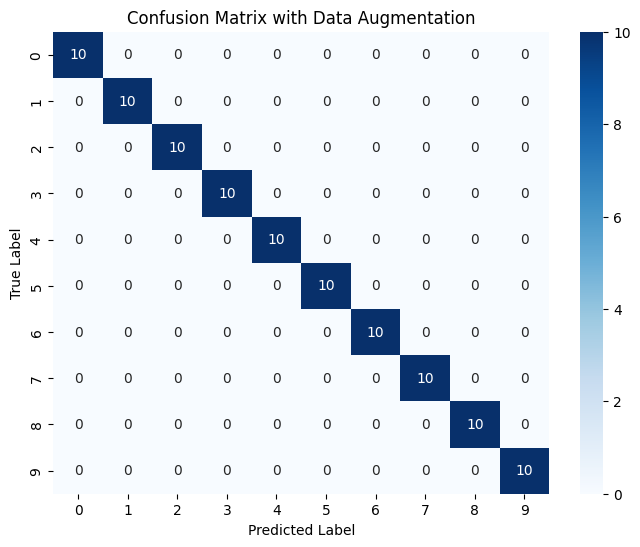

In [2]:
import seaborn as sns
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with Data Augmentation")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [1]:
'''Here the confusion matrix as all diagonal elements are 10, it means that the model made no mistakes and 
accurately classified all samples in each class.
'''

'Here the confusion matrix as all diagonal elements are 10, it means that the model made no mistakes and \naccurately classified all samples in each class.\n'